In [1]:
from google.colab import files
from IPython.display import Image



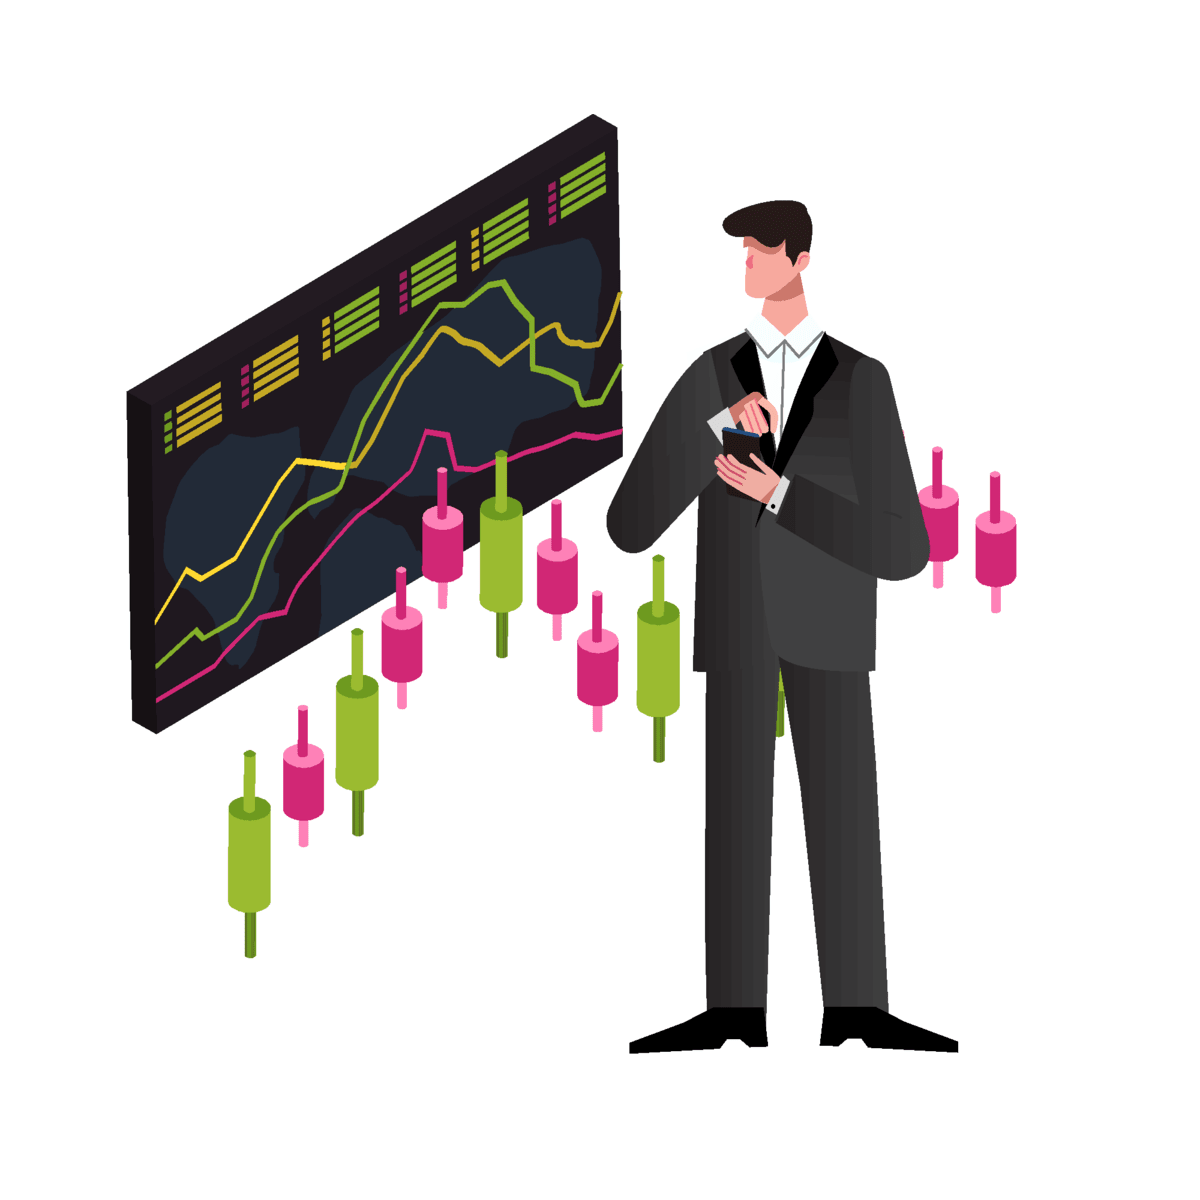

In [2]:
Image('/content/—Pngtree—vector stock market stock finance_7164448.png',width=725)

In [24]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Importing necessary Libraries

In [26]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=2d85e206190aba5b097f1dbb49eb68038340e295b6bd647201087acb2c5b2033
  Stored in directory: /root/.cache/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go

from ta.trend import MACD
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands

from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

Reading Data

In [30]:
df=pd.read_csv('/content/google_stock_price.csv')

In [31]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [32]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4837,2023-11-06,130.220001,131.559998,129.929993,131.449997,131.449997,15360400
4838,2023-11-07,131.979996,133.279999,131.139999,132.399994,132.399994,19223800
4839,2023-11-08,132.360001,133.539993,132.160004,133.259995,133.259995,15093600
4840,2023-11-09,133.360001,133.960007,131.509995,131.690002,131.690002,17976500
4841,2023-11-10,131.529999,134.270004,130.869995,134.059998,134.059998,20872900


In [33]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


Exploratory Data Analysis (EDA)

Visualizing the trends and patterns in the price data over time using line charts or candlestick charts.

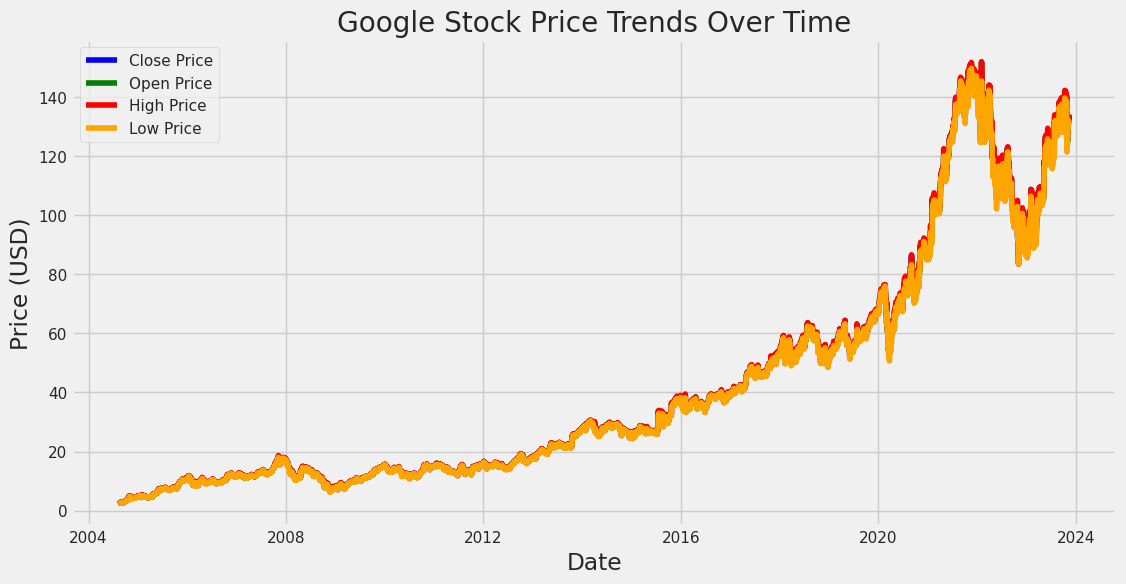

In [34]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['Open'], label='Open Price', color='green')
plt.plot(df['Date'], df['High'], label='High Price', color='red')
plt.plot(df['Date'], df['Low'], label='Low Price', color='orange')

plt.title('Google Stock Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                name='Stock')])

fig.update_layout(title='Stock Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price (USD)')

fig.show()


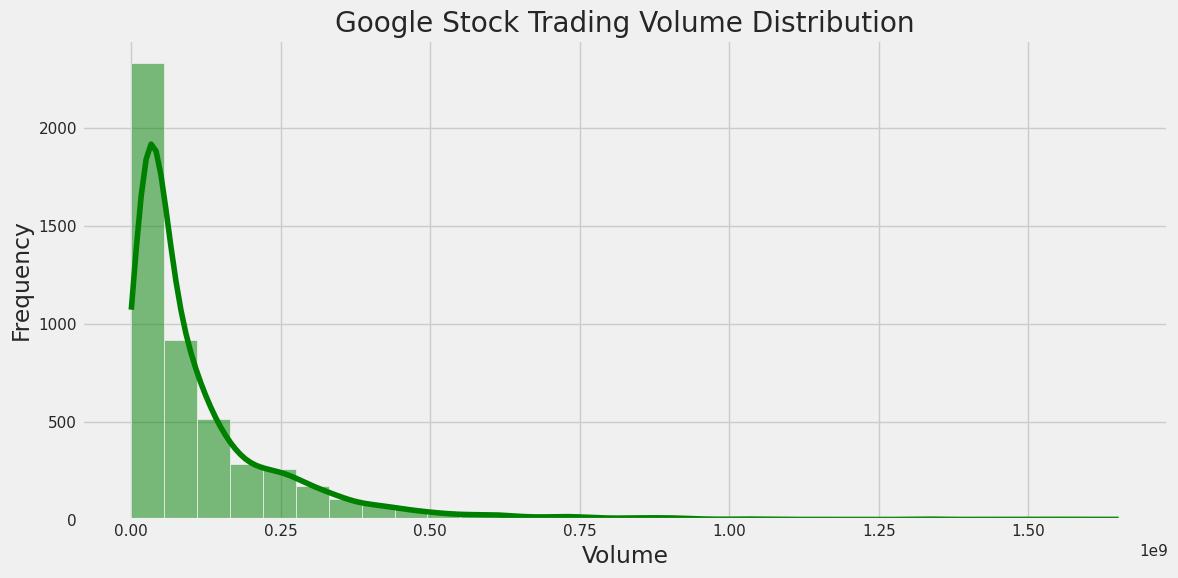

In [36]:
plt.figure(figsize=(12, 6))

# Plot histogram for Google stock trading volume
plt.subplot(1, 1, 1)
sns.histplot(df['Volume'], bins=30, kde=True, color='green')
plt.title('Google Stock Trading Volume Distribution')
plt.xlabel('Volume')
plt.ylabel('Frequency')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

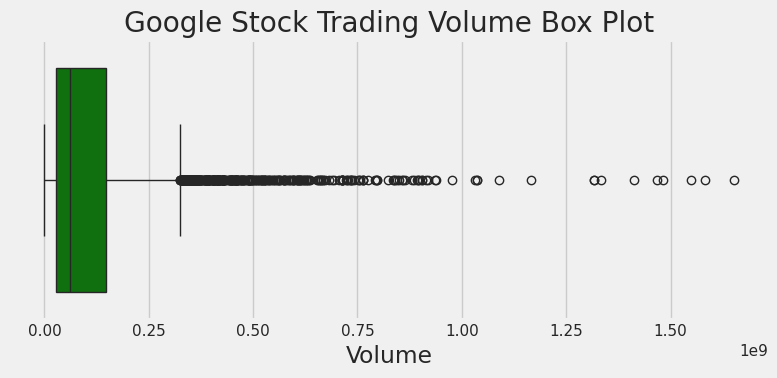

In [37]:
plt.figure(figsize=(8, 4))

# Box plot for Google stock trading volume
plt.subplot(1, 1, 1)
sns.boxplot(x=df['Volume'], color='green')
plt.title('Google Stock Trading Volume Box Plot')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

In [38]:
google_volume_iqr = df['Volume'].quantile(0.75) - df['Volume'].quantile(0.25)
google_volume_upper_bound = df['Volume'].quantile(0.75) + 1.5 * google_volume_iqr

# Identify outliers for Google stock
google_outliers = df[df['Volume'] > google_volume_upper_bound]

# Print or further analyze the identified outliers
print("Google Stock Outliers:")
print(google_outliers)

Google Stock Outliers:
           Date       Open       High        Low      Close  Adj Close  \
0    2004-08-19   2.490664   2.591785   2.390042   2.499133   2.499133   
1    2004-08-20   2.515820   2.716817   2.503118   2.697639   2.697639   
2    2004-08-23   2.758411   2.826406   2.716070   2.724787   2.724787   
27   2004-09-28   3.021176   3.173106   2.994028   3.159657   3.159657   
28   2004-09-29   3.155672   3.362895   3.143966   3.264763   3.264763   
...         ...        ...        ...        ...        ...        ...   
1869 2012-01-20  14.708120  14.719826  14.488195  14.595044  14.595044   
1927 2012-04-13  16.128298  16.164164  15.530289  15.556690  15.556690   
2058 2012-10-18  18.817966  18.914602  16.836891  17.310118  17.310118   
2059 2012-10-19  17.573629  17.601524  16.737265  16.981100  16.981100   
2308 2013-10-18  24.323330  25.291700  24.259071  25.190828  25.190828   

         Volume  
0     897427216  
1     458857488  
2     366857939  
27    340190355 

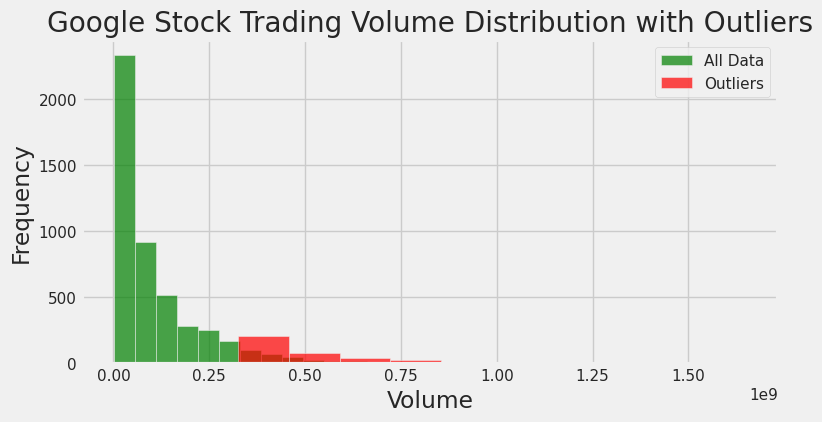

In [39]:
google_volume_iqr = df['Volume'].quantile(0.75) - df['Volume'].quantile(0.25)
google_volume_upper_bound = df['Volume'].quantile(0.75) + 1.5 * google_volume_iqr

# Identify outliers for Google stock
google_outliers = df[df['Volume'] > google_volume_upper_bound]

# Plot histograms for Google stock volume, highlighting outliers
plt.figure(figsize=(8, 4))

plt.hist(df['Volume'], bins=30, color='green', alpha=0.7, label='All Data')
plt.hist(google_outliers['Volume'], bins=10, color='red', alpha=0.7, label='Outliers')
plt.title('Google Stock Trading Volume Distribution with Outliers')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.legend()

plt.show()

Volatility Analysis

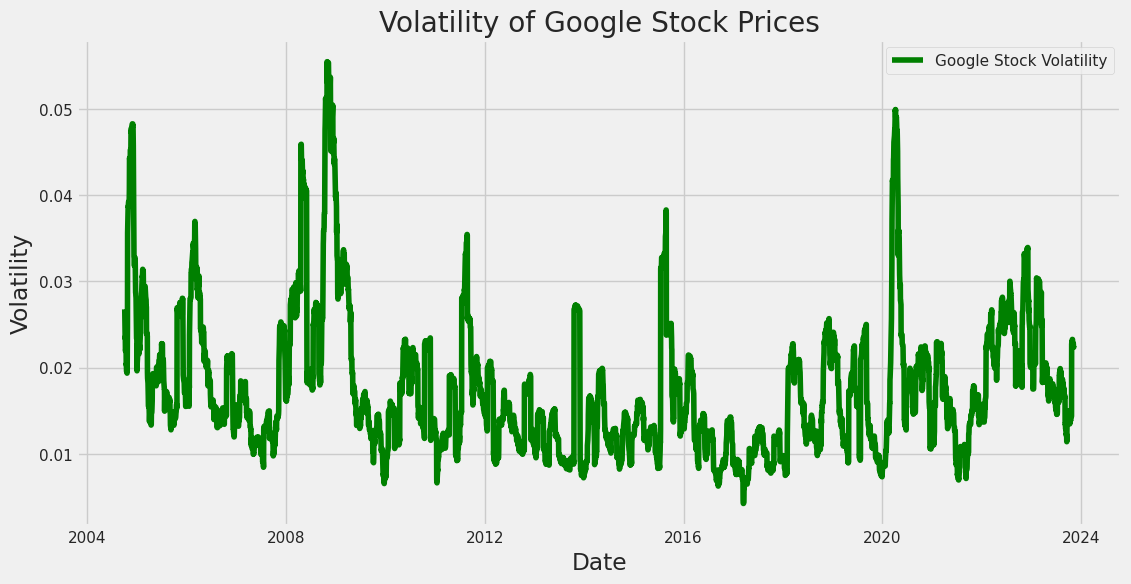

In [40]:
df['Daily_Return'] = df['Close'].pct_change()

# Calculate the rolling standard deviation (volatility) for a specified window
window_size = 30  # You can adjust this value based on your preference
google_volatility = df['Daily_Return'].rolling(window=window_size).std()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], google_volatility, label='Google Stock Volatility', color='green')
plt.title('Volatility of Google Stock Prices')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

Moving Averages

Appling moving average techniques (e.g., simple moving averages or exponential moving averages) to smooth out price trends¶

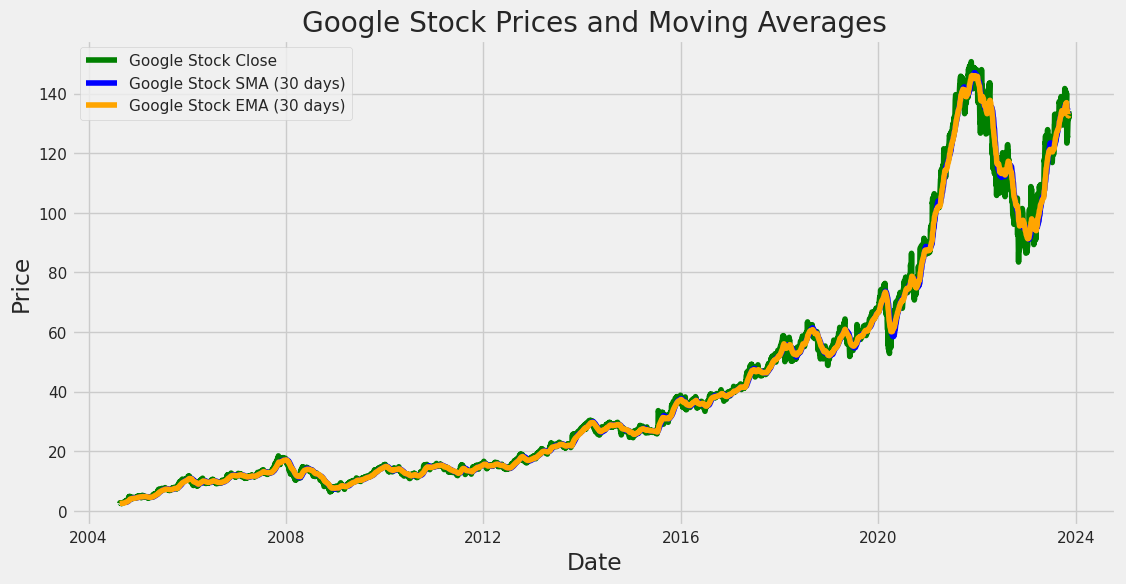

In [41]:
sma_window = 30  # Adjust the window size based on your preference
df['SMA'] = df['Close'].rolling(window=sma_window).mean()

# Calculate the exponential moving averages (EMA)
ema_window = 30  # Adjust the window size based on your preference
df['EMA'] = df['Close'].ewm(span=ema_window, adjust=False).mean()

# Plotting
plt.figure(figsize=(12, 6))

# Plot Google stock prices and moving averages
plt.plot(df['Date'], df['Close'], label='Google Stock Close', color='green')
plt.plot(df['Date'], df['SMA'], label=f'Google Stock SMA ({sma_window} days)', color='blue')
plt.plot(df['Date'], df['EMA'], label=f'Google Stock EMA ({ema_window} days)', color='orange')
plt.title('Google Stock Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Seasonal Trends

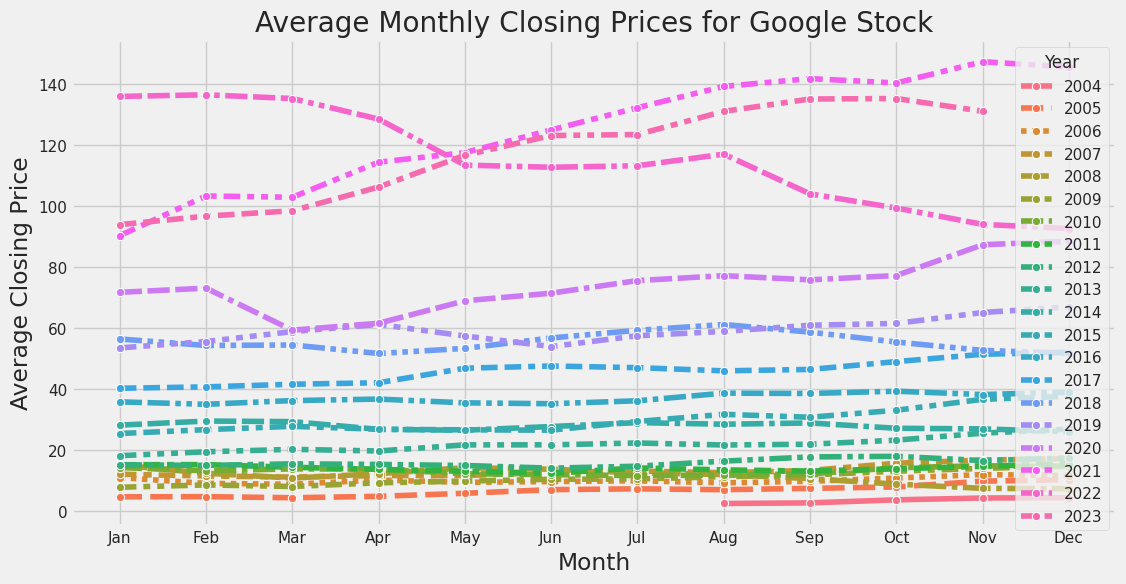

In [42]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Group by month and calculate the average closing price
average_monthly_prices = df.groupby(['Month', 'Year'])['Close'].mean().reset_index()

# Pivot the table for better visualization
pivot_table = average_monthly_prices.pivot(index='Month', columns='Year', values='Close')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_table, marker='o')
plt.title('Average Monthly Closing Prices for Google Stock')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()

Technical Analysis

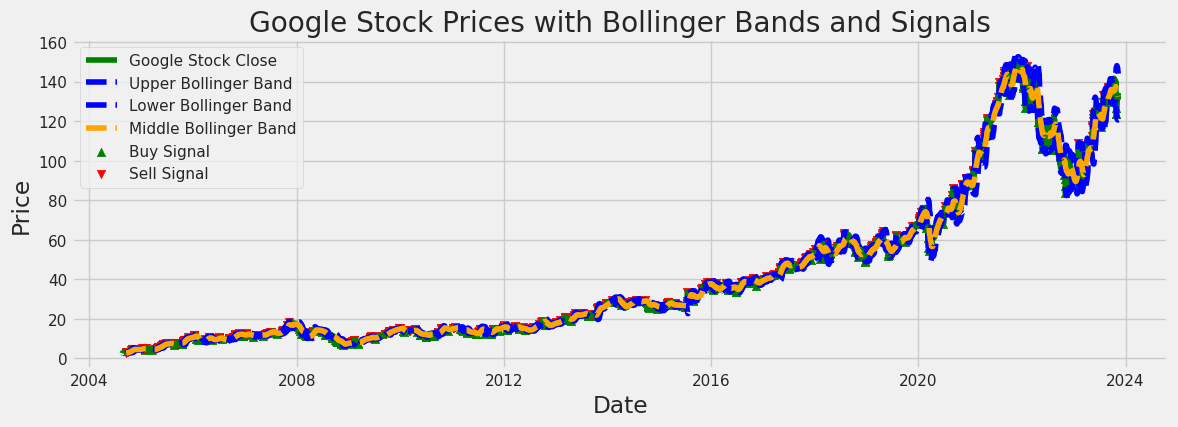

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using z

Mean Squared Error: 2115.693655364352


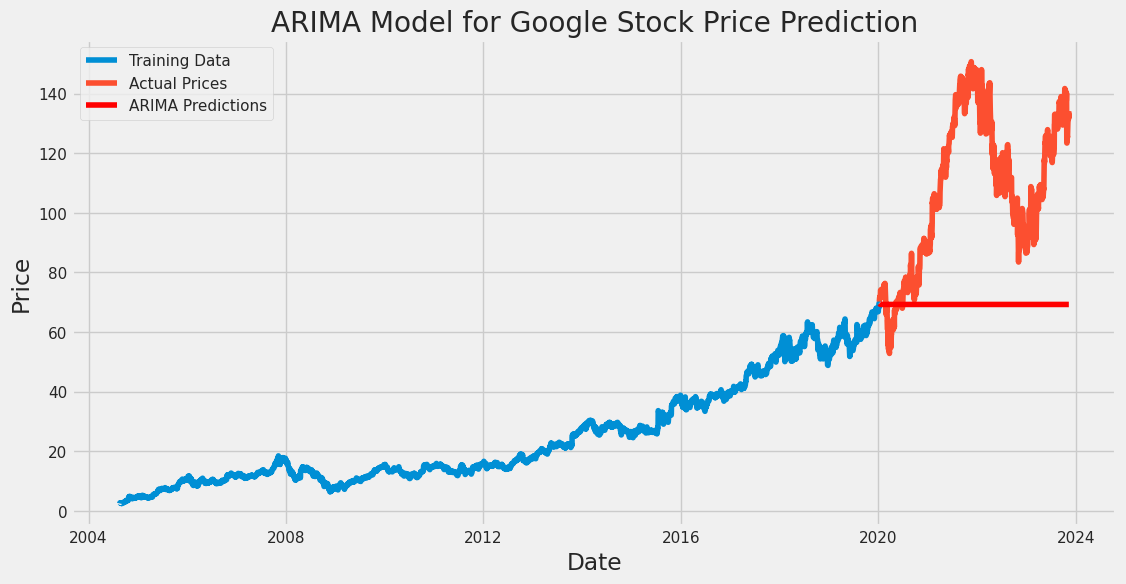

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



121/121 - 2s - 17ms/step - loss: 0.0050
Epoch 2/100
121/121 - 0s - 3ms/step - loss: 3.5389e-05
Epoch 3/100
121/121 - 0s - 2ms/step - loss: 3.2149e-05
Epoch 4/100
121/121 - 0s - 2ms/step - loss: 3.1618e-05
Epoch 5/100
121/121 - 0s - 2ms/step - loss: 3.1377e-05
Epoch 6/100
121/121 - 0s - 2ms/step - loss: 3.1187e-05
Epoch 7/100
121/121 - 0s - 2ms/step - loss: 3.0851e-05
Epoch 8/100
121/121 - 0s - 2ms/step - loss: 3.0394e-05
Epoch 9/100
121/121 - 0s - 3ms/step - loss: 3.0435e-05
Epoch 10/100
121/121 - 0s - 2ms/step - loss: 2.9497e-05
Epoch 11/100
121/121 - 0s - 2ms/step - loss: 2.9199e-05
Epoch 12/100
121/121 - 0s - 2ms/step - loss: 2.8632e-05
Epoch 13/100
121/121 - 0s - 2ms/step - loss: 2.7965e-05
Epoch 14/100
121/121 - 0s - 2ms/step - loss: 2.7349e-05
Epoch 15/100
121/121 - 0s - 2ms/step - loss: 2.6884e-05
Epoch 16/100
121/121 - 0s - 3ms/step - loss: 2.6782e-05
Epoch 17/100
121/121 - 0s - 2ms/step - loss: 2.5209e-05
Epoch 18/100
121/121 - 0s - 2ms/step - loss: 2.4837e-05
Epoch 19/100
121

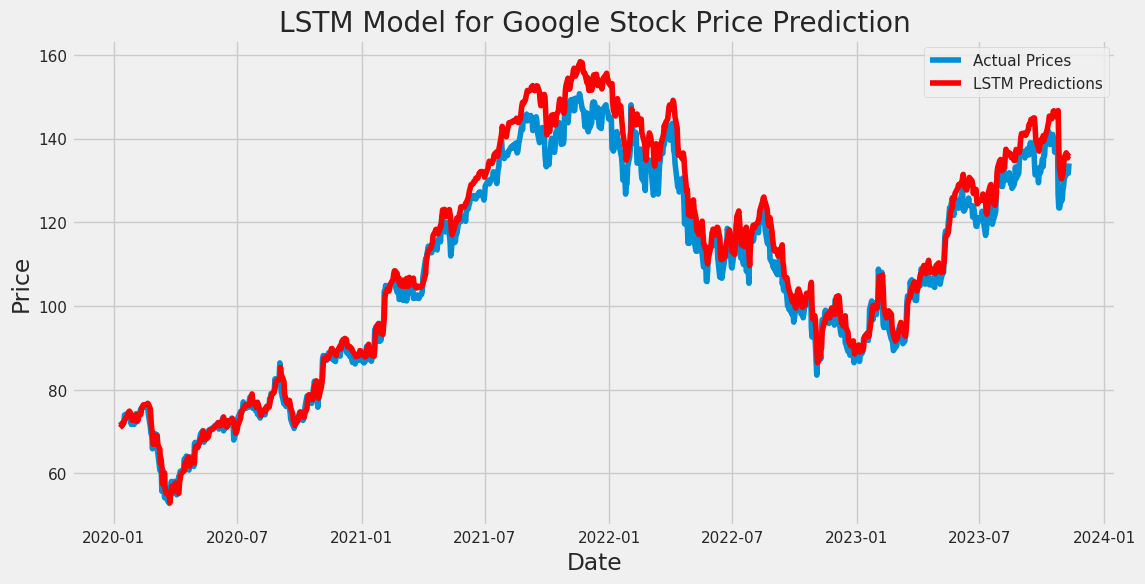

In [46]:
df['macd'] = MACD(df['Close']).macd()

# RSI
df['rsi'] = RSIIndicator(df['Close']).rsi()

# Bollinger Bands
bb_bands_google = BollingerBands(df['Close'])
df['bb_upper'] = bb_bands_google.bollinger_hband()
df['bb_lower'] = bb_bands_google.bollinger_lband()
df['bb_mid'] = bb_bands_google.bollinger_mavg()

# Identify buy and sell signals based on Bollinger Bands
df['Buy_Signal'] = (df['Close'] < df['bb_lower']).astype(int)
df['Sell_Signal'] = (df['Close'] > df['bb_upper']).astype(int)

# Plotting
plt.figure(figsize=(12, 8))

# Plot Google stock prices and technical indicators with signals
plt.subplot(2, 1, 1)
plt.plot(df['Date'], df['Close'], label='Google Stock Close', color='green')
plt.plot(df['Date'], df['bb_upper'], label='Upper Bollinger Band', linestyle='--', color='blue')
plt.plot(df['Date'], df['bb_lower'], label='Lower Bollinger Band', linestyle='--', color='blue')
plt.plot(df['Date'], df['bb_mid'], label='Middle Bollinger Band', linestyle='--', color='orange')
plt.scatter(df['Date'][df['Buy_Signal'] == 1], df['Close'][df['Buy_Signal'] == 1], label='Buy Signal', marker='^', color='green')
plt.scatter(df['Date'][df['Sell_Signal'] == 1], df['Close'][df['Sell_Signal'] == 1], label='Sell Signal', marker='v', color='red')
plt.title('Google Stock Prices with Bollinger Bands and Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Select relevant columns and set 'Date' as the index
google_data = df[['Date', 'Close']].set_index('Date')

# Split the data into training and testing sets
train_size = int(len(google_data) * 0.8)
train, test = google_data.iloc[:train_size], google_data.iloc[train_size:]

# Train the ARIMA model
model = ARIMA(train, order=(5, 1, 2))
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.forecast(steps=len(test))

# Evaluate the model
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Prices')
plt.plot(test.index, predictions, label='ARIMA Predictions', color='red')
plt.title('ARIMA Model for Google Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
# Select relevant columns and set 'Date' as the index
google_data = df[['Date', 'Close']].set_index('Date')

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(google_data)

# Prepare the data for LSTM
def create_dataset(dataset, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_steps):
        a = dataset[i:(i+time_steps), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_steps, 0])
    return np.array(dataX), np.array(dataY)

time_steps = 10  # Adjust as needed
X, y = create_dataset(scaled_data, time_steps)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
trainX, testX = X[:train_size], X[train_size:]
trainY, testY = y[:train_size], y[train_size:]

# Reshape the input data for LSTM
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, time_steps), activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(trainX, trainY, epochs=100, batch_size=32, verbose=2)

# Make predictions on the test set
predictions = model.predict(testX)
predictions = scaler.inverse_transform(predictions)

# Invert the scaling for the actual values
actual_values = scaler.inverse_transform([testY])

# Evaluate the model
mse = mean_squared_error(actual_values[0], predictions[:, 0])
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(google_data.index[train_size+time_steps:], actual_values[0], label='Actual Prices')
plt.plot(google_data.index[train_size+time_steps:], predictions[:, 0], label='LSTM Predictions', color='red')
plt.title('LSTM Model for Google Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()




Predictions

ARIMA

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using z

Mean Squared Error: 2115.693655364352


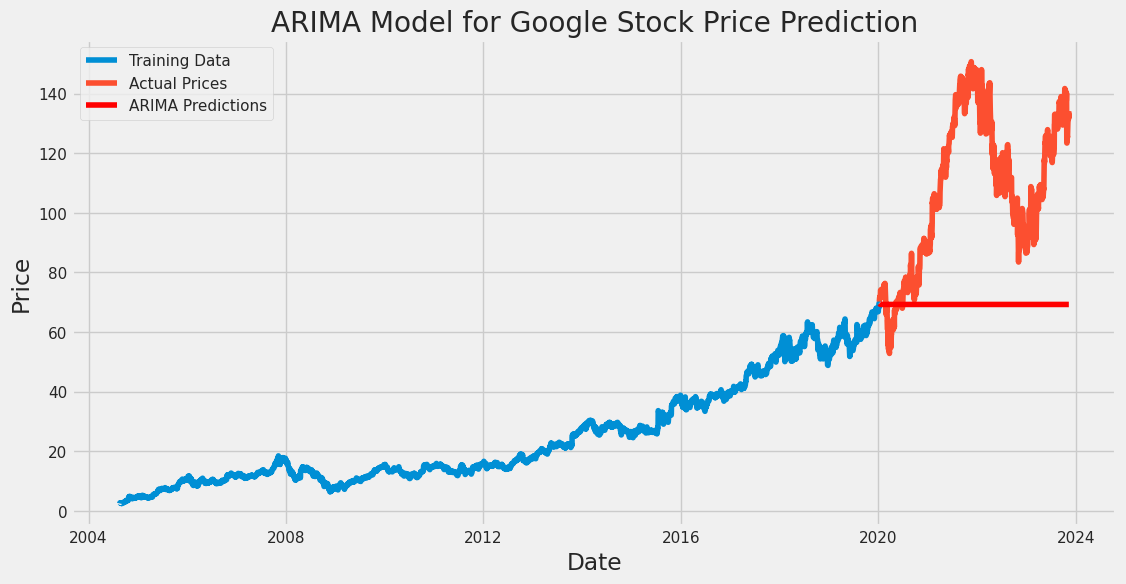

In [47]:
google_data = df[['Date', 'Close']].set_index('Date')

# Split the data into training and testing sets
train_size = int(len(google_data) * 0.8)
train, test = google_data.iloc[:train_size], google_data.iloc[train_size:]

# Train the ARIMA model
model = ARIMA(train, order=(5, 1, 2))
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.forecast(steps=len(test))

# Evaluate the model
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Prices')
plt.plot(test.index, predictions, label='ARIMA Predictions', color='red')
plt.title('ARIMA Model for Google Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

LSTM

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



121/121 - 5s - 43ms/step - loss: 0.0064
Epoch 2/100
121/121 - 1s - 6ms/step - loss: 3.3604e-05
Epoch 3/100
121/121 - 1s - 9ms/step - loss: 3.1805e-05
Epoch 4/100
121/121 - 0s - 2ms/step - loss: 3.1414e-05
Epoch 5/100
121/121 - 0s - 2ms/step - loss: 3.1080e-05
Epoch 6/100
121/121 - 0s - 2ms/step - loss: 3.0177e-05
Epoch 7/100
121/121 - 0s - 2ms/step - loss: 2.9675e-05
Epoch 8/100
121/121 - 0s - 2ms/step - loss: 2.9317e-05
Epoch 9/100
121/121 - 0s - 2ms/step - loss: 2.8699e-05
Epoch 10/100
121/121 - 0s - 3ms/step - loss: 2.8000e-05
Epoch 11/100
121/121 - 0s - 2ms/step - loss: 2.7368e-05
Epoch 12/100
121/121 - 0s - 2ms/step - loss: 2.6442e-05
Epoch 13/100
121/121 - 0s - 2ms/step - loss: 2.6027e-05
Epoch 14/100
121/121 - 0s - 2ms/step - loss: 2.4328e-05
Epoch 15/100
121/121 - 0s - 2ms/step - loss: 2.3739e-05
Epoch 16/100
121/121 - 0s - 2ms/step - loss: 2.2144e-05
Epoch 17/100
121/121 - 0s - 2ms/step - loss: 2.2077e-05
Epoch 18/100
121/121 - 0s - 3ms/step - loss: 2.0442e-05
Epoch 19/100
121

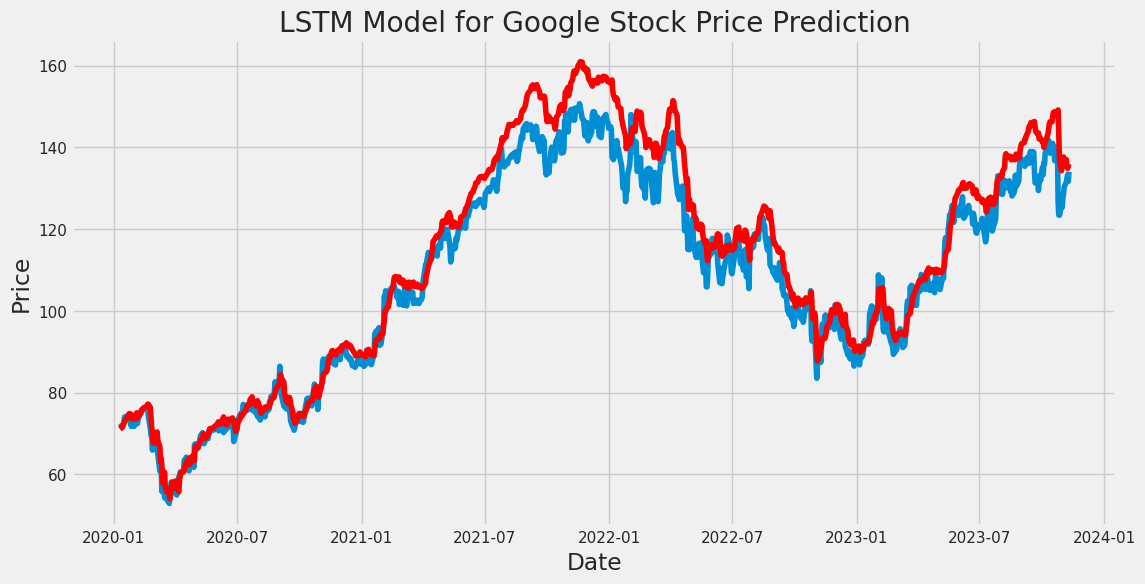

In [48]:
google_data = df[['Date', 'Close']].set_index('Date')

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(google_data)

# Prepare the data for LSTM
def create_dataset(dataset, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_steps):
        a = dataset[i:(i+time_steps), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_steps, 0])
    return np.array(dataX), np.array(dataY)

    time_steps = 10  # Adjust as needed
X, y = create_dataset(scaled_data, time_steps)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
trainX, testX = X[:train_size], X[train_size:]
trainY, testY = y[:train_size], y[train_size:]

# Reshape the input data for LSTM
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, time_steps), activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


# Train the model
model.fit(trainX, trainY, epochs=100, batch_size=32, verbose=2)

# Make predictions on the test set
predictions = model.predict(testX)
predictions = scaler.inverse_transform(predictions)

# Invert the scaling for the actual values
actual_values = scaler.inverse_transform([testY])

# Evaluate the model
mse = mean_squared_error(actual_values[0], predictions[:, 0])
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(google_data.index[train_size+time_steps:], actual_values[0], label='Actual Prices')
plt.plot(google_data.index[train_size+time_steps:], predictions[:, 0], label='LSTM Predictions', color='red')
plt.title('LSTM Model for Google Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()